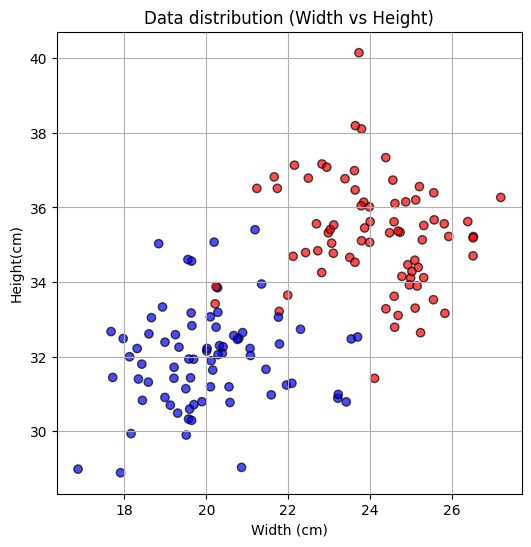

Sample with (width,height): (25.0, 32.0) classified as pikachu
Sample with (width,height): (24.2, 31.5) classified as pikachu
Sample with (width,height): (22.0, 34.0) classified as pikachu
Sample with (width,height): (20.5, 34.0) classified as pichu
Width must be a positiv number
could not convert string to float: '9,6'
Sample with (width,height): (23.0,35.0) classified as pikachu
The average accuracy of these ten tests is 0.95.


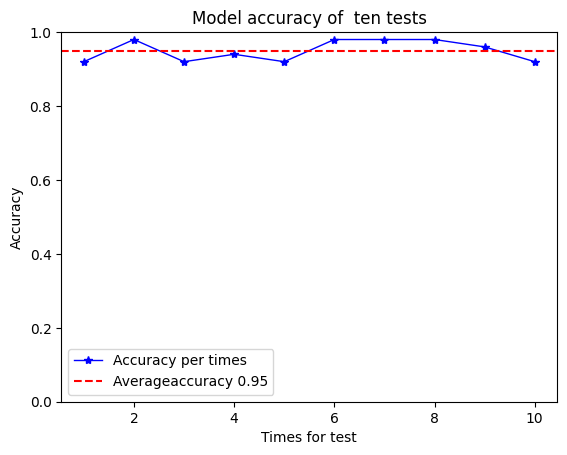

In [16]:
# Grund uppgift

import numpy as np
import matplotlib.pyplot as plt
import re



# läs in träningspunkterna 
data = np.genfromtxt("../Labb2/datapoints.txt", delimiter =",", skip_header=1 )


#Array size och label
Size = data[:, 0:2].astype(float)
Label = data[:, 2].astype(int)


# plotta alla punkterna
plt.figure (figsize = (6,6))
plt.scatter(Size[:,0], Size[:,1], c=Label, cmap="bwr", alpha=0.7, edgecolors="k")

plt.title("Data distribution (Width vs Height)")
plt.xlabel("Width (cm)")
plt.ylabel("Height(cm)")
plt.grid(True)
plt.show()


# läs in filen för testpunkter
with open ("../Labb2/testpoints.txt", "r") as f:
    text = f.read()
# clean data
Clean_data = re.findall(r'\(([\d\.]+),\s*([\d\.]+)\)', text)

# Array testpunkter
test = np.array (Clean_data, dtype=float)

# Beränkna avstånd mellan testpunkter och tränningspunkter samt hitta näramaste träningspunkten
def Euclidean (a,b):
    return np.sqrt(np.sum((a-b)**2))

result = []
for T in test:
    distance = [Euclidean (T, D) for D in Size]
    nearnest = int (Label[np.argmin(distance)]) 
    result.append(nearnest) #Spara näramaste label i listan.


# klassificera testpunkter enligt label av träningspunkterna
for item ,point  in enumerate(test):
    if result[item] == 0:
        category = "pichu"
    else:
        category = "pikachu"

    print (f"Sample with (width,height): {tuple(map(float,point))} classified as {category}")

# Uppgift
# Ber användare mata in en testpunkt och se till när det blir fel

while True:
    W = input ("Please enter width (cm):") 
    try:
        W = float (W)
        if W  <= 0:
            raise ValueError ("Width must be a positiv number")
        break
    except ValueError as err:
        print (err)

while True:
    H= input ("Please enter height (cm):") 
    try:
        H = float (H)
        if H  <= 0:
            raise ValueError ("Height must be a positiv number")
        break
    except ValueError as err:
        print (err)

User_test = [W,H]

# Beränkna avstånd mellan inmatade punkt och tränningspunkter samt hitta de tio näramaste träningspunkterna
distance = [Euclidean(User_test, D) for D in Size]
nearnest = Label [np.argsort(distance) [:10]]

value, counts = np.unique(nearnest, return_counts=True)
result = value [np.argmax(counts)]


# klassificera testpunkter enligt label av träningspunkterna
if result == 0:
        category = "pichu"
else:
        category = "pikachu"

print (f"Sample with (width,height): ({W},{H}) classified as {category}")

# Bonusuppgift 

# Definiera en funktion för att dela slumpmässigt upp originaldata, 25 testdata i varje kategori och resten som träningsdata.

def split_train_test(X, Y):
    
    test_data = []
    train_data = []

    unique_label = np.unique(Y)
    for C in unique_label:
        category_index = np.where (Y==C)[0]
        np.random.shuffle(category_index)  
        test_random = (category_index)[:25]
        train_random = (category_index)[25:]

        test_data.extend (test_random)
        train_data.extend (train_random)
    return X[test_data], X[train_data], Y[test_data],Y[train_data]

# random_state: int-slumpfrö, garantera reproducerbara result.
np.random.seed(42)

# Upprepa tio gånger för validering 
accuracy_test = []

for n in range (10):
    
    X_test,X_train,Y_test,Y_train = split_train_test(Size,Label) # dela in ursprungsdatanslumpmässigt

    # Beränkna avstånd och hitta de tio näramaste träningspunkterna
    result_split = []

    for X_T in X_test:
        distance = [Euclidean (X_T, X_D) for X_D in X_train]
        nearnest = Y_train[np.argsort(distance) [:10]]
        value, counts = np.unique(nearnest, return_counts=True)
        result = value [np.argmax(counts)]
        result_split.append(result)

    result_split = np.array(result_split)

    # Validering av testresultat och ränkna accuracy

    TP_Pikachu = np.sum((result_split==1) & (Y_test ==1))
    FP_Pikachu = np.sum((result_split==1) & (Y_test ==0))
    TN_Pichu = np.sum((result_split == 0) & (Y_test==0))
    FN_Pichu = np.sum((result_split == 0) & (Y_test==1))

    accuracy = (TP_Pikachu+TN_Pichu)/(TP_Pikachu+FP_Pikachu+TN_Pichu+FN_Pichu)
    accuracy_test.append(accuracy)

# plotta en graf och räkna medelaccuracy
accuracy_test = np.array (accuracy_test)
averageaccuracy = np.mean(accuracy_test) 
print(f"The average accuracy of these ten tests is {float(averageaccuracy):.2f}.")

y_axis = accuracy_test
x_axis = list(range(1, 11))

plt.plot(x_axis, y_axis, marker = "*",color ="blue", linewidth =1, linestyle="solid", label = "Accuracy per times" )
plt.axhline(y = averageaccuracy,color ="red", linestyle="--", label=f"Averageaccuracy {float(averageaccuracy):.2f}")
plt.ylim(0,1)
plt.xlabel ("Times for test")
plt.ylabel ("Accuracy")
plt. title("Model accuracy of  ten tests")
plt.legend()
plt.show()